# Association Rules using book dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\Data Scientist\Association Rules\Dataset\book.csv")


In [3]:
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Itemsets

In [4]:
frequent_itemsets = apriori(data,min_support = 0.0075,max_len = 4,use_colnames = True)

C:\ProgramData\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
461,0.0090,"(ArtBks, GeogBks, Florence, ItalArt)"
462,0.0125,"(ItalCook, ArtBks, ItalArt, ItalAtlas)"
463,0.0095,"(ItalCook, ArtBks, Florence, ItalArt)"
464,0.0090,"(ItalCook, GeogBks, ItalArt, ItalAtlas)"


In [6]:
# Most frequent itemsets based on support
frequent_itemsets.sort_values('support',ascending =False,inplace = True) 

In [7]:
frequent_itemsets

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(CookBks, ChildBks)"
...,...,...
423,0.0075,"(CookBks, GeogBks, Florence, ItalArt)"
346,0.0075,"(ItalCook, CookBks, YouthBks, Florence)"
408,0.0075,"(ItalCook, CookBks, RefBks, Florence)"
351,0.0075,"(RefBks, YouthBks, DoItYBks, Florence)"


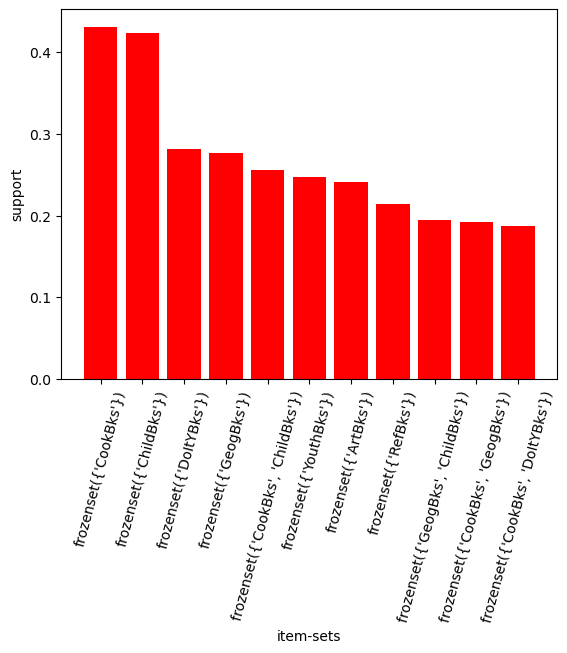

In [8]:
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color ='red')
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=75)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [9]:
# Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
print(rules.head(20))

   antecedents consequents  antecedent support  consequent support  support  \
0    (CookBks)  (ChildBks)              0.4310              0.4230   0.2560   
1   (ChildBks)   (CookBks)              0.4230              0.4310   0.2560   
2    (GeogBks)  (ChildBks)              0.2760              0.4230   0.1950   
3   (ChildBks)   (GeogBks)              0.4230              0.2760   0.1950   
4    (CookBks)   (GeogBks)              0.4310              0.2760   0.1925   
5    (GeogBks)   (CookBks)              0.2760              0.4310   0.1925   
6    (CookBks)  (DoItYBks)              0.4310              0.2820   0.1875   
7   (DoItYBks)   (CookBks)              0.2820              0.4310   0.1875   
8   (ChildBks)  (DoItYBks)              0.4230              0.2820   0.1840   
9   (DoItYBks)  (ChildBks)              0.2820              0.4230   0.1840   
10   (CookBks)    (ArtBks)              0.4310              0.2410   0.1670   
11    (ArtBks)   (CookBks)              0.2410      

In [10]:
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2143,"(RefBks, ItalArt)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429,0.998145
2142,"(ArtBks, ItalAtlas)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000,0.996112
3340,"(GeogBks, ItalAtlas)","(RefBks, ItalArt)",0.0205,0.0200,0.0115,0.560976,28.048780,0.011090,2.232222,0.984531
3341,"(RefBks, ItalArt)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.011090,2.304706,0.984028
3148,"(ItalCook, ItalAtlas)","(RefBks, ItalArt)",0.0230,0.0200,0.0125,0.543478,27.173913,0.012040,2.146667,0.985875
...,...,...,...,...,...,...,...,...,...,...
1012,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605,0.039926
3569,(Florence),"(ChildBks, YouthBks, DoItYBks)",0.1085,0.0950,0.0105,0.096774,1.018676,0.000192,1.001964,0.020565
3556,"(ChildBks, YouthBks, DoItYBks)",(Florence),0.0950,0.1085,0.0105,0.110526,1.018676,0.000192,1.002278,0.020258
670,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920,0.027250


In [11]:
# Duplication elimination)
def to_list(i):
    return (sorted(list(i)))

In [12]:
ma_store_data = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

In [13]:
ma_store_data = ma_store_data.apply(sorted)
ma_store_data

0                          [ChildBks, CookBks]
1                          [ChildBks, CookBks]
2                          [ChildBks, GeogBks]
3                          [ChildBks, GeogBks]
4                           [CookBks, GeogBks]
                         ...                  
4481    [Florence, GeogBks, ItalArt, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [Florence, GeogBks, ItalArt, ItalCook]
4484    [Florence, GeogBks, ItalArt, ItalCook]
4485    [Florence, GeogBks, ItalArt, ItalCook]
Length: 4486, dtype: object

In [14]:
rules_sets = list(ma_store_data)
rules_sets

[['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', '

In [15]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['ChildBks', 'CookBks', 'ItalCook', 'RefBks'],
 ['ChildBks', 'ItalAtlas', 'ItalCook', 'YouthBks'],
 ['ChildBks', 'CookBks', 'RefBks', 'YouthBks'],
 ['CookBks', 'DoItYBks', 'GeogBks', 'ItalCook'],
 ['ItalArt', 'ItalCook', 'RefBks', 'YouthBks'],
 ['GeogBks', 'ItalArt', 'ItalCook', 'RefBks'],
 ['CookBks', 'DoItYBks', 'Florence', 'GeogBks'],
 ['ArtBks', 'CookBks', 'ItalArt', 'YouthBks'],
 ['CookBks', 'DoItYBks', 'GeogBks'],
 ['ItalAtlas', 'YouthBks'],
 ['ArtBks', 'CookBks', 'GeogBks', 'ItalArt'],
 ['ArtBks', 'DoItYBks', 'ItalCook', 'RefBks'],
 ['ChildBks', 'Florence', 'RefBks', 'YouthBks'],
 ['CookBks', 'Florence', 'GeogBks', 'YouthBks'],
 ['ArtBks', 'CookBks', 'ItalArt', 'ItalAtlas'],
 ['ItalArt', 'RefBks'],
 ['DoItYBks', 'Florence', 'YouthBks'],
 ['CookBks', 'Florence', 'GeogBks'],
 ['ChildBks', 'DoItYBks', 'ItalCook', 'YouthBks'],
 ['DoItYBks', 'ItalArt', 'ItalCook'],
 ['ArtBks', 'ItalArt', 'YouthBks'],
 ['ChildBks', 'ItalArt', 'ItalCook', 'YouthBks'],
 ['ChildBks', 'CookBks', 'ItalArt

In [16]:
index_rules=[]

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [17]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
798,"(ItalCook, CookBks, ChildBks)",(RefBks),0.0850,0.2145,0.0415,0.488235,2.276155,0.023267,1.534885,0.612746
3418,"(ItalCook, ChildBks, YouthBks)",(ItalAtlas),0.0460,0.0370,0.0110,0.239130,6.462985,0.009298,1.265657,0.886030
312,"(CookBks, ChildBks, YouthBks)",(RefBks),0.1290,0.2145,0.0680,0.527132,2.457491,0.040330,1.661139,0.680919
938,"(ItalCook, CookBks, GeogBks)",(DoItYBks),0.0640,0.2820,0.0345,0.539062,1.911569,0.016452,1.557695,0.509476
4028,"(ItalCook, YouthBks, RefBks)",(ItalArt),0.0265,0.0485,0.0090,0.339623,7.002529,0.007715,1.440843,0.880528
...,...,...,...,...,...,...,...,...,...,...
1068,"(ItalCook, CookBks, ArtBks)",(YouthBks),0.0565,0.2475,0.0305,0.539823,2.181103,0.016516,1.635240,0.573944
1164,"(ArtBks, GeogBks)",(ItalArt),0.1275,0.0485,0.0295,0.231373,4.770568,0.023316,1.237921,0.905881
3986,"(ArtBks, ChildBks, DoItYBks)",(ItalAtlas),0.0950,0.0370,0.0090,0.094737,2.560455,0.005485,1.063779,0.673419
1554,"(ArtBks, ChildBks, GeogBks)",(Florence),0.1020,0.1085,0.0230,0.225490,2.078251,0.011933,1.151051,0.577757


In [18]:
# Sorting them with respect to list and getting top 10 rules 
rules = rules_no_redudancy.sort_values('lift', ascending = False).head(10)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3878,"(DoItYBks, RefBks, ItalArt)",(ItalAtlas),0.0110,0.0370,0.0095,0.863636,23.341523,0.009093,7.062000,0.967804
3334,"(GeogBks, RefBks, ItalArt)",(ItalAtlas),0.0135,0.0370,0.0115,0.851852,23.023023,0.011000,6.500250,0.969656
2136,"(ArtBks, RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857,0.974644
2162,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857,0.974644
2600,"(ChildBks, RefBks, ItalArt)",(ItalAtlas),0.0180,0.0370,0.0145,0.805556,21.771772,0.013834,4.952571,0.971557
2894,"(CookBks, RefBks, ItalArt)",(ItalAtlas),0.0165,0.0370,0.0130,0.787879,21.294021,0.012389,4.539857,0.969027
3142,"(ItalCook, RefBks, ItalArt)",(ItalAtlas),0.0160,0.0370,0.0125,0.781250,21.114865,0.011908,4.402286,0.968130
4210,"(YouthBks, RefBks, ItalArt)",(ItalAtlas),0.0110,0.0370,0.0085,0.772727,20.884521,0.008093,4.237200,0.962707
3906,"(ItalCook, ArtBks, Florence)",(ItalArt),0.0120,0.0485,0.0095,0.791667,16.323024,0.008918,4.567200,0.950139
2908,"(ItalCook, ArtBks, RefBks)",(ItalAtlas),0.0235,0.0370,0.0130,0.553191,14.951121,0.012130,2.155286,0.955571
